In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
 #for getting the csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crimes.csv')
print("***** First Five Rows of Data *****")
print()
df.head()

***** First Five Rows of Data *****



,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
STATE/UT,0
DISTRICT,0
Year,0
Rape,0
Kidnapping and Abduction,0
Dowry Deaths,0
Assault on women with intent to outrage her modesty,0
Insult to modesty of Women,0
Cruelty by Husband or his Relatives,0


In [5]:
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']
                       +df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])

In [8]:
def with_hue(data,feature,ax):

    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    bars=ax.patches
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat]
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=10)


In [9]:
def without_hue(data,feature,ax):

    total=float(len(data))
    bars_plot=ax.patches

    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y+2,y,ha='center',fontweight='bold',fontsize=7)

In [39]:
#for checking the number of state repetitions
value_count=list(df["STATE/UT"].value_counts())
print("***** Value counts of STATES/UT *****")
print()
print(value_count)

***** Value counts of STATES/UT *****

[878, 628, 552, 540, 469, 454, 430, 399, 384, 370, 362, 322, 314, 312, 309, 268, 266, 233, 195, 183, 176, 168, 154, 138, 125, 111, 108, 96, 93, 92, 87, 83, 77, 74, 73, 67, 62, 62, 61, 60, 58, 58, 55, 54, 50, 43, 39, 39, 36, 36, 36, 32, 31, 28, 24, 24, 24, 24, 24, 22, 21, 20, 14, 11, 7, 6, 6, 4, 4, 4, 4, 4]


In [40]:
#total_crimes
crimes=['Rape','Kidnapping and Abduction','Dowry Deaths',
        'Assault on women with intent to outrage her modesty',
        'Insult to modesty of Women','Cruelty by Husband or his Relatives',
        'Importation of Girls','total_crimes']

In [43]:
df['total_crimes']=(df['Rape']+df['Kidnapping and Abduction']+df['Dowry Deaths']+
                       df['Assault on women with intent to outrage her modesty']+
                       df['Insult to modesty of Women']
                       +df['Cruelty by Husband or his Relatives']+
                       df['Importation of Girls'])

df1=pd.DataFrame()
for i in crimes:
  df_crimes=df.groupby(['Year'])[i].sum()
  df1[i]=df_crimes
print("***** Total number of crimes from 2001 to 2014 *****")
print()
df1

***** Total number of crimes from 2001 to 2014 *****



,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
Year,,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228,261450
2002,32746,29012,13644,67886,20310,98474,152,262224
2003,31694,26592,12416,65878,24650,101406,92,262728
2004,36466,31156,14052,69134,20002,116242,178,287230
2005,36718,31500,13574,68350,19968,116638,298,287046
2006,38696,34828,15236,73234,19932,126256,134,308316
2007,41474,40832,16186,77468,21900,151860,122,349842
2008,42934,45878,16344,80826,24428,162688,134,373232
2009,42794,51482,16766,77422,22018,179092,96,389670


/tmp/ipython-input-1116054059.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=df1, x=arr, y='total_crimes', palette='rocket_r', ax=ax)
/tmp/ipython-input-1116054059.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


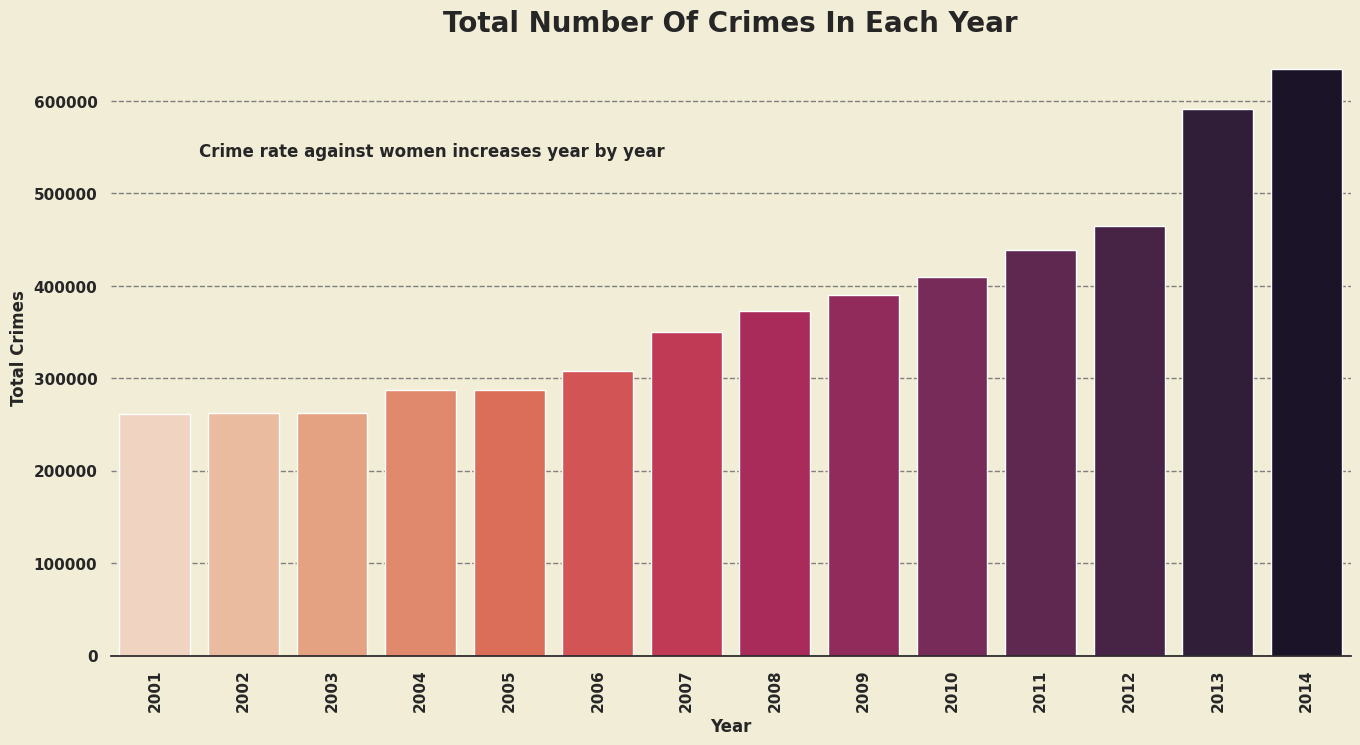

In [14]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(16,8))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid
ax.grid(linestyle="--", axis="y", color='gray')

# Create year array
lower_year = 2001
upper_year = 2014
arr = np.arange(lower_year, upper_year+1)

# Plot
a = sns.barplot(data=df1, x=arr, y='total_crimes', palette='rocket_r', ax=ax)

# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add annotation
plt.text(0.5, 540000, "Crime rate against women increases year by year",
         fontweight='bold')

# Labels and title
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Total Crimes", fontweight='bold')
plt.title("Total Number Of Crimes In Each Year", fontweight='bold', fontsize=20)

# <- Not sure what this function is (maybe your custom function?)
# without_hue(df1, 'total_crimes', a)

plt.show()


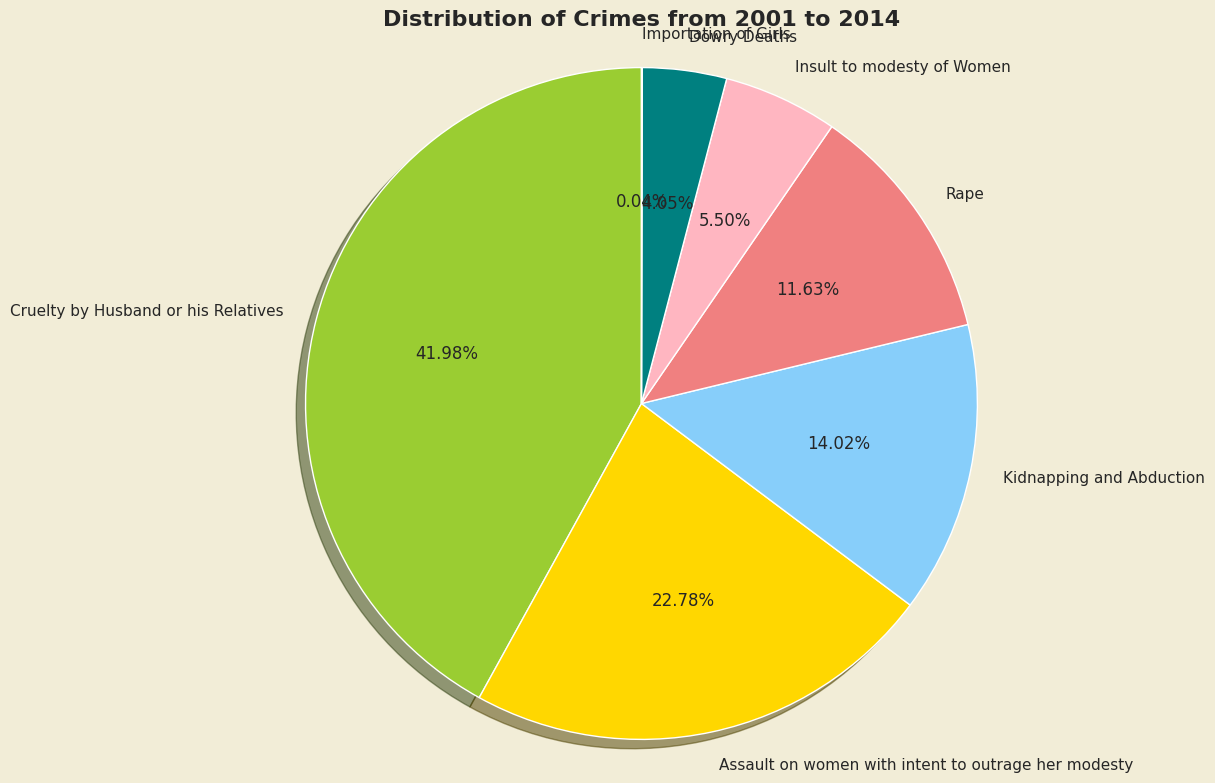

In [18]:
# TOTAL NUMBER OF EACH CATEGORY CRIME 2001 TO 2014
crimes = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Build list of dicts
data = []
for i in crimes:
    data.append({'crimes': i, 'total': df[i].sum(axis=0)})

# Convert to DataFrame
df_top_crimes = pd.DataFrame(data)

# Sort values
df_top_crimes = df_top_crimes.sort_values(by='total', ascending=False)

# Lists for plotting
list_crimes_number = list(df_top_crimes['total'])
list_crimes = list(df_top_crimes['crimes'])

# Plot
fig = plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral',
          'lightpink', 'teal', 'green']

plt.pie(
    list_crimes_number,
    colors=colors,
    labels=list_crimes,
    autopct='%1.2f%%',
    shadow=True,
    startangle=90
)

plt.title("Distribution of Crimes from 2001 to 2014", fontweight='bold', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()



In [19]:
crimes = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls',
    'total_crimes'
]

df_state = pd.DataFrame()

for i in crimes:
    df_state_crimes = df.groupby(['STATE/UT'])[i].sum()
    df_state[i] = df_state_crimes

print("***** Each category of crimes in each state from 2001 to 2014 *****")
print()

df_state = df_state.sort_values(by='total_crimes', ascending=False)
df_state = df_state.reset_index()   # <- you forgot to assign back

df_state


***** Each category of crimes in each state from 2001 to 2014 *****



,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,ANDHRA PRADESH,26958,29872,12430,103998,72262,238014,34,483568
1,UTTAR PRADESH,38116,95180,47648,59396,53022,155234,6,448602
2,WEST BENGAL,41574,43546,10344,45742,3108,261336,228,405878
3,MADHYA PRADESH,72174,18486,18072,159756,18634,79938,120,367180
4,RAJASTHAN,31596,49342,10132,61706,708,200202,12,353698
...,...,...,...,...,...,...,...,...,...
67,DAMAN & DIU,40,30,6,30,4,70,0,180
68,D&N Haveli,20,36,0,6,4,14,0,80
69,Daman & Diu,20,14,0,10,0,6,0,50
70,LAKSHADWEEP,14,2,0,10,0,14,0,40


In [20]:
 #5 states with most crime rate
df_state.head()


,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
0,ANDHRA PRADESH,26958,29872,12430,103998,72262,238014,34,483568
1,UTTAR PRADESH,38116,95180,47648,59396,53022,155234,6,448602
2,WEST BENGAL,41574,43546,10344,45742,3108,261336,228,405878
3,MADHYA PRADESH,72174,18486,18072,159756,18634,79938,120,367180
4,RAJASTHAN,31596,49342,10132,61706,708,200202,12,353698


In [23]:
#5 states with least crime rate
df_state.tail()

,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
67,DAMAN & DIU,40,30,6,30,4,70,0,180
68,D&N Haveli,20,36,0,6,4,14,0,80
69,Daman & Diu,20,14,0,10,0,6,0,50
70,LAKSHADWEEP,14,2,0,10,0,14,0,40
71,Lakshadweep,6,0,0,4,4,0,0,14


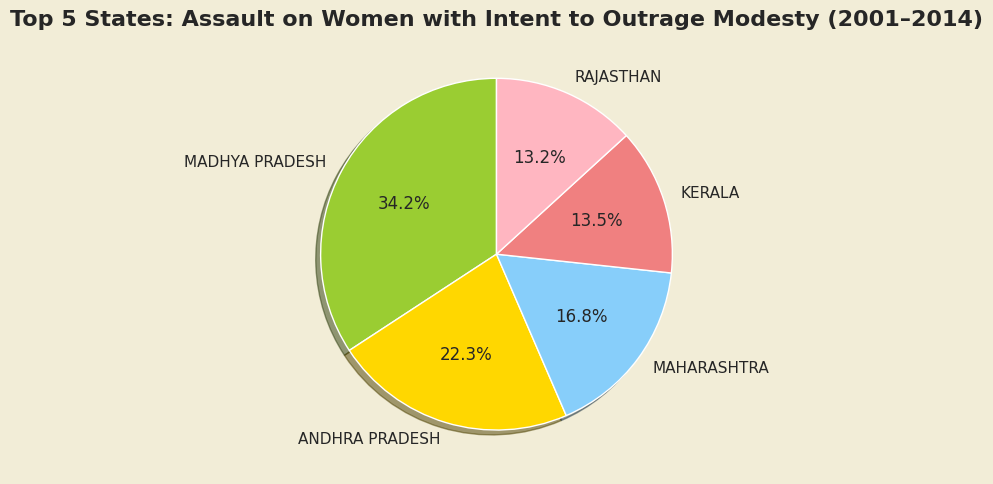

In [27]:
# Sort states by assault crime numbers
df_state_assault = df_state.sort_values(
    by='Assault on women with intent to outrage her modesty',
    ascending=False
)

# Take top 5 states
df_higha = df_state_assault.head()

# Plot
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

plt.pie(
    df_higha['Assault on women with intent to outrage her modesty'],
    colors=colors,
    labels=df_higha['STATE/UT'],   # State names as labels
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)

plt.title(
    "Top 5 States: Assault on Women with Intent to Outrage Modesty (2001–2014)",
    fontweight='bold',
    fontsize=16
)

plt.tight_layout()
plt.show()

In [33]:
df_up=df_state.loc[df_state['STATE/UT']=='Uttar Pradesh']
df_up

,STATE/UT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,total_crimes
13,Uttar Pradesh,13034,40726,9608,31816,108,38504,0,133796


In [34]:
crime_up = [
    'Rape',
    'Kidnapping and Abduction',
    'Dowry Deaths',
    'Assault on women with intent to outrage her modesty',
    'Insult to modesty of Women',
    'Cruelty by Husband or his Relatives',
    'Importation of Girls'
]

# Build list of dicts instead of append()
data = []
for i in crime_up:
    data.append({'Crimes in UP': i, 'total': df_up[i].sum(axis=0)})

# Convert to DataFrame
df_crime_up = pd.DataFrame(data)

# Sort values
df_crime_up = df_crime_up.sort_values(by='total', ascending=False)

print("***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****")
print()
df_crime_up


***** Total count of each crime from 2001 to 2014 in Uttar Pradesh *****



,Crimes in UP,total
1,Kidnapping and Abduction,40726
5,Cruelty by Husband or his Relatives,38504
3,Assault on women with intent to outrage her mo...,31816
0,Rape,13034
2,Dowry Deaths,9608
4,Insult to modesty of Women,108
6,Importation of Girls,0


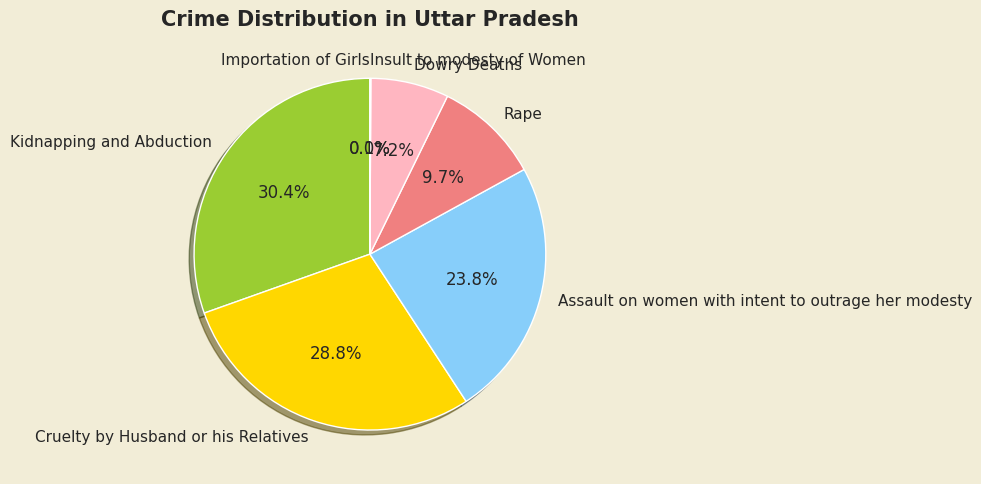

In [35]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

plt.pie(
    df_crime_up['total'],
    colors=colors,
    labels=df_crime_up['Crimes in UP'],
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)

plt.title("Crime Distribution in Uttar Pradesh", fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4287356859.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(data=df_crime_up, x="Crimes in UP", y='total', palette='rocket_r')
/tmp/ipython-input-4287356859.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


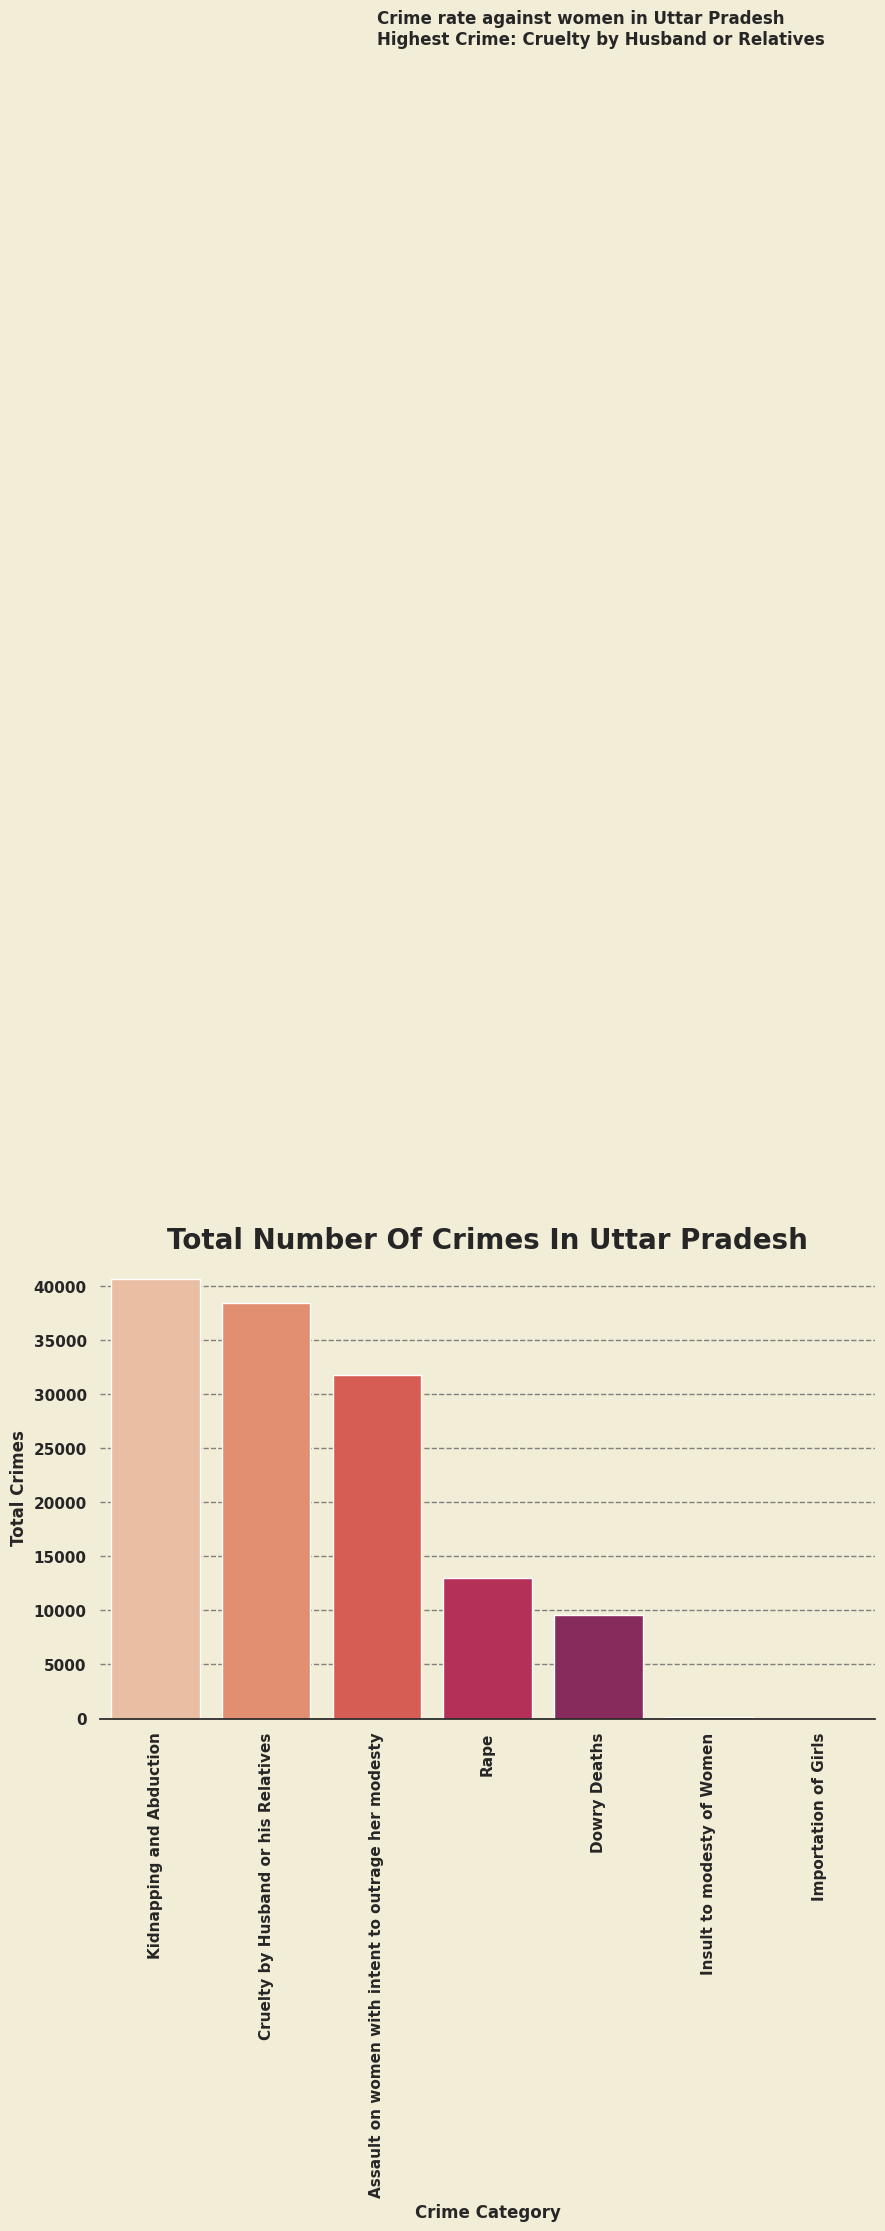

In [36]:
sns.set_theme(style='white', context='notebook')

fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ax.set_facecolor("#F2EDD7FF")
fig.patch.set_facecolor("#F2EDD7FF")

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid
ax.grid(linestyle="--", axis="y", color='gray')

# Barplot
a = sns.barplot(data=df_crime_up, x="Crimes in UP", y='total', palette='rocket_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add annotation
plt.text(
    2, 155000,
    "Crime rate against women in Uttar Pradesh\nHighest Crime: Cruelty by Husband or Relatives",
    fontweight='bold'
)

# Labels and title
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Crime Category", fontweight='bold')
plt.ylabel("Total Crimes", fontweight='bold')
plt.title("Total Number Of Crimes In Uttar Pradesh", fontweight='bold', fontsize=20)

# Optional: remove if undefined
# without_hue(df_crime_up, 'total_crimes', a)

plt.show()
